# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

Paso 1: Instalación de dependencias

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re


Paso 2: Descargar HTML

In [2]:
url = 'https://juegosdelamesaredonda.com/'
response = requests.get(url)
response.status_code


200

In [3]:
response.content

b' \n\n<!doctype html>\n<html lang="es-ES"  class="default" >\n\n  <head>\n    \n      \n  <meta charset="utf-8">\n\n\n  <meta http-equiv="x-ua-compatible" content="ie=edge">\n\n\n\n  <title>Comprar Juegos de mesa, juegos de cartas, juegos de rol, juegos de importaci\xc3\xb3n y juegos para ni\xc3\xb1os</title>\n  \n      \n    <script id=\'lgcookieslaw_script_gtm\'>\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){\n            dataLayer.push(arguments);\n        }\n\n        gtag(\'consent\', \'default\', {\n            \'ad_storage\': \'denied\',\n            \'ad_user_data\': \'denied\',\n            \'ad_personalization\': \'denied\',\n            \'analytics_storage\': \'denied\',\n            \'personalization_storage\': \'granted\',\n            \'security_storage\': \'granted\'\n        });\n    </script>\n\n  \n    <script id=\'lgcookieslaw_script_ms\'>\n        window.uetq = window.uetq || [];\n\n        window.uetq.push(\'consent\', \'default\', {

Paso 3: Transforma el HTML

In [4]:
soup = BeautifulSoup(response.content)
soup


<!DOCTYPE html>
<html class="default" lang="es-ES">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<title>Comprar Juegos de mesa, juegos de cartas, juegos de rol, juegos de importación y juegos para niños</title>
<script id="lgcookieslaw_script_gtm">
        window.dataLayer = window.dataLayer || [];
        function gtag(){
            dataLayer.push(arguments);
        }

        gtag('consent', 'default', {
            'ad_storage': 'denied',
            'ad_user_data': 'denied',
            'ad_personalization': 'denied',
            'analytics_storage': 'denied',
            'personalization_storage': 'granted',
            'security_storage': 'granted'
        });
    </script>
<script id="lgcookieslaw_script_ms">
        window.uetq = window.uetq || [];

        window.uetq.push('consent', 'default', {
            'ad_storage': 'denied',
        });
    </script>
<meta content="Juegos de la Mesa Redonda. Tienda on-line especializada donde c

In [5]:
products = soup.find_all('div', class_='product-meta')
len(products), products[0] 


(41,
 <div class="product-meta">
 <!-- @file modules\appagebuilder\views\templates\front\products\file_tpl -->
 <h3 class="h3 product-title"><a href="https://juegosdelamesaredonda.com/16939-the-mandalorian-adventures-un-clan-de-dos-castellano-0841333132408.html">The Mandalorian: Adventures - Un Clan de Dos (castellano)</a></h3>
 <!-- @file modules\appagebuilder\views\templates\front\products\file_tpl -->
 <div class="product-price-and-shipping">
 <span aria-label="Precio regular" class="regular-price">39,95 €</span>
 <span class="discount-percentage discount-product">-10%</span>
 <span aria-label="Precio" class="price">
                           35,96 €
               </span>
 </div>
 <!-- @file modules\appagebuilder\views\templates\front\products\file_tpl -->
 <div class="leo-list-product-reviews">
 <div class="leo-list-product-reviews-wraper">
 <div class="star_content clearfix">
 <div class="star star_on"></div>
 <div class="star star_on"></div>
 <div class="star star_on"></div>
 <

In [6]:
price_tag = soup.find_all('span', class_='price')
price_tag[0]

<span aria-label="Precio" class="price">
                          35,96 €
              </span>

In [7]:
productsp = soup.find_all('div', class_= 'product-price-and-shipping')
productsp[0]


<div class="product-price-and-shipping">
<span aria-label="Precio regular" class="regular-price">39,95 €</span>
<span class="discount-percentage discount-product">-10%</span>
<span aria-label="Precio" class="price">
                          35,96 €
              </span>
</div>

Paso 4: Procesa el DataFrame

In [8]:
products = soup.find_all('div', class_='product-meta')
len(products), products[0] 
list_products = []
for product in products:
    product_name = product.find_all('h3', class_='h3 product-title')
    price = product.find_all('span', class_='price')
    price_line = price[0].text
    price_clean =  re.findall(r'\d+[.,]?\d*', price_line)
    
    list_products.append({'name': product_name[0].text,
                          'price': price_clean[0]})
list_products 

[{'name': 'The Mandalorian: Adventures - Un Clan de Dos (castellano)',
  'price': '35,96'},
 {'name': 'Naruto Shippuden: Combates de Ninjas', 'price': '22,46'},
 {'name': 'Critter Kitchen: A la Carta (castellano)', 'price': '22,46'},
 {'name': 'Mazmorra: One Deck Dungeon (castellano)', 'price': '19,76'},
 {'name': 'Ziggurat', 'price': '33,26'},
 {'name': 'Earthborne rangers (castellano)', 'price': '85,46'},
 {'name': 'Dead Cells el Juego de Mesa (castellano)', 'price': '80,96'},
 {'name': 'Exit: La Academia de las Artes Magicas', 'price': '13,46'},
 {'name': 'Dungeons and Dragons: Guia del Dungeon Master Nueva Edicion (castellano)',
  'price': '42,70'},
 {'name': 'Strange World (castellano)', 'price': '14,36'},
 {'name': 'Pequeños Grandes Reinos', 'price': '23,96'},
 {'name': 'Star Wars: Imperial Assault', 'price': '98,96'},
 {'name': 'Cthulhu: Death May Die (castellano)', 'price': '98,96'},
 {'name': 'La llamada de Cthulhu: Caja de inicio - Edicion Revisada',
  'price': '35,63'},
 {'n

In [9]:
df = pd.DataFrame(list_products)
df

,name,price
0,The Mandalorian: Adventures - Un Clan de Dos (...,"35,96"
1,Naruto Shippuden: Combates de Ninjas,"22,46"
2,Critter Kitchen: A la Carta (castellano),"22,46"
3,Mazmorra: One Deck Dungeon (castellano),"19,76"
4,Ziggurat,"33,26"
5,Earthborne rangers (castellano),"85,46"
6,Dead Cells el Juego de Mesa (castellano),"80,96"
7,Exit: La Academia de las Artes Magicas,"13,46"
8,Dungeons and Dragons: Guia del Dungeon Master ...,"42,70"
9,Strange World (castellano),"14,36"


Paso 5: Almacena los datos en sqlite

In [10]:
df['price_float'] = df['price'].str.replace(',', '.')
df

,name,price,price_float
0,The Mandalorian: Adventures - Un Clan de Dos (...,"35,96",35.96
1,Naruto Shippuden: Combates de Ninjas,"22,46",22.46
2,Critter Kitchen: A la Carta (castellano),"22,46",22.46
3,Mazmorra: One Deck Dungeon (castellano),"19,76",19.76
4,Ziggurat,"33,26",33.26
5,Earthborne rangers (castellano),"85,46",85.46
6,Dead Cells el Juego de Mesa (castellano),"80,96",80.96
7,Exit: La Academia de las Artes Magicas,"13,46",13.46
8,Dungeons and Dragons: Guia del Dungeon Master ...,"42,70",42.70
9,Strange World (castellano),"14,36",14.36


Paso 6: Visualiza los datos

/tmp/ipykernel_1551/3714851140.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_float',


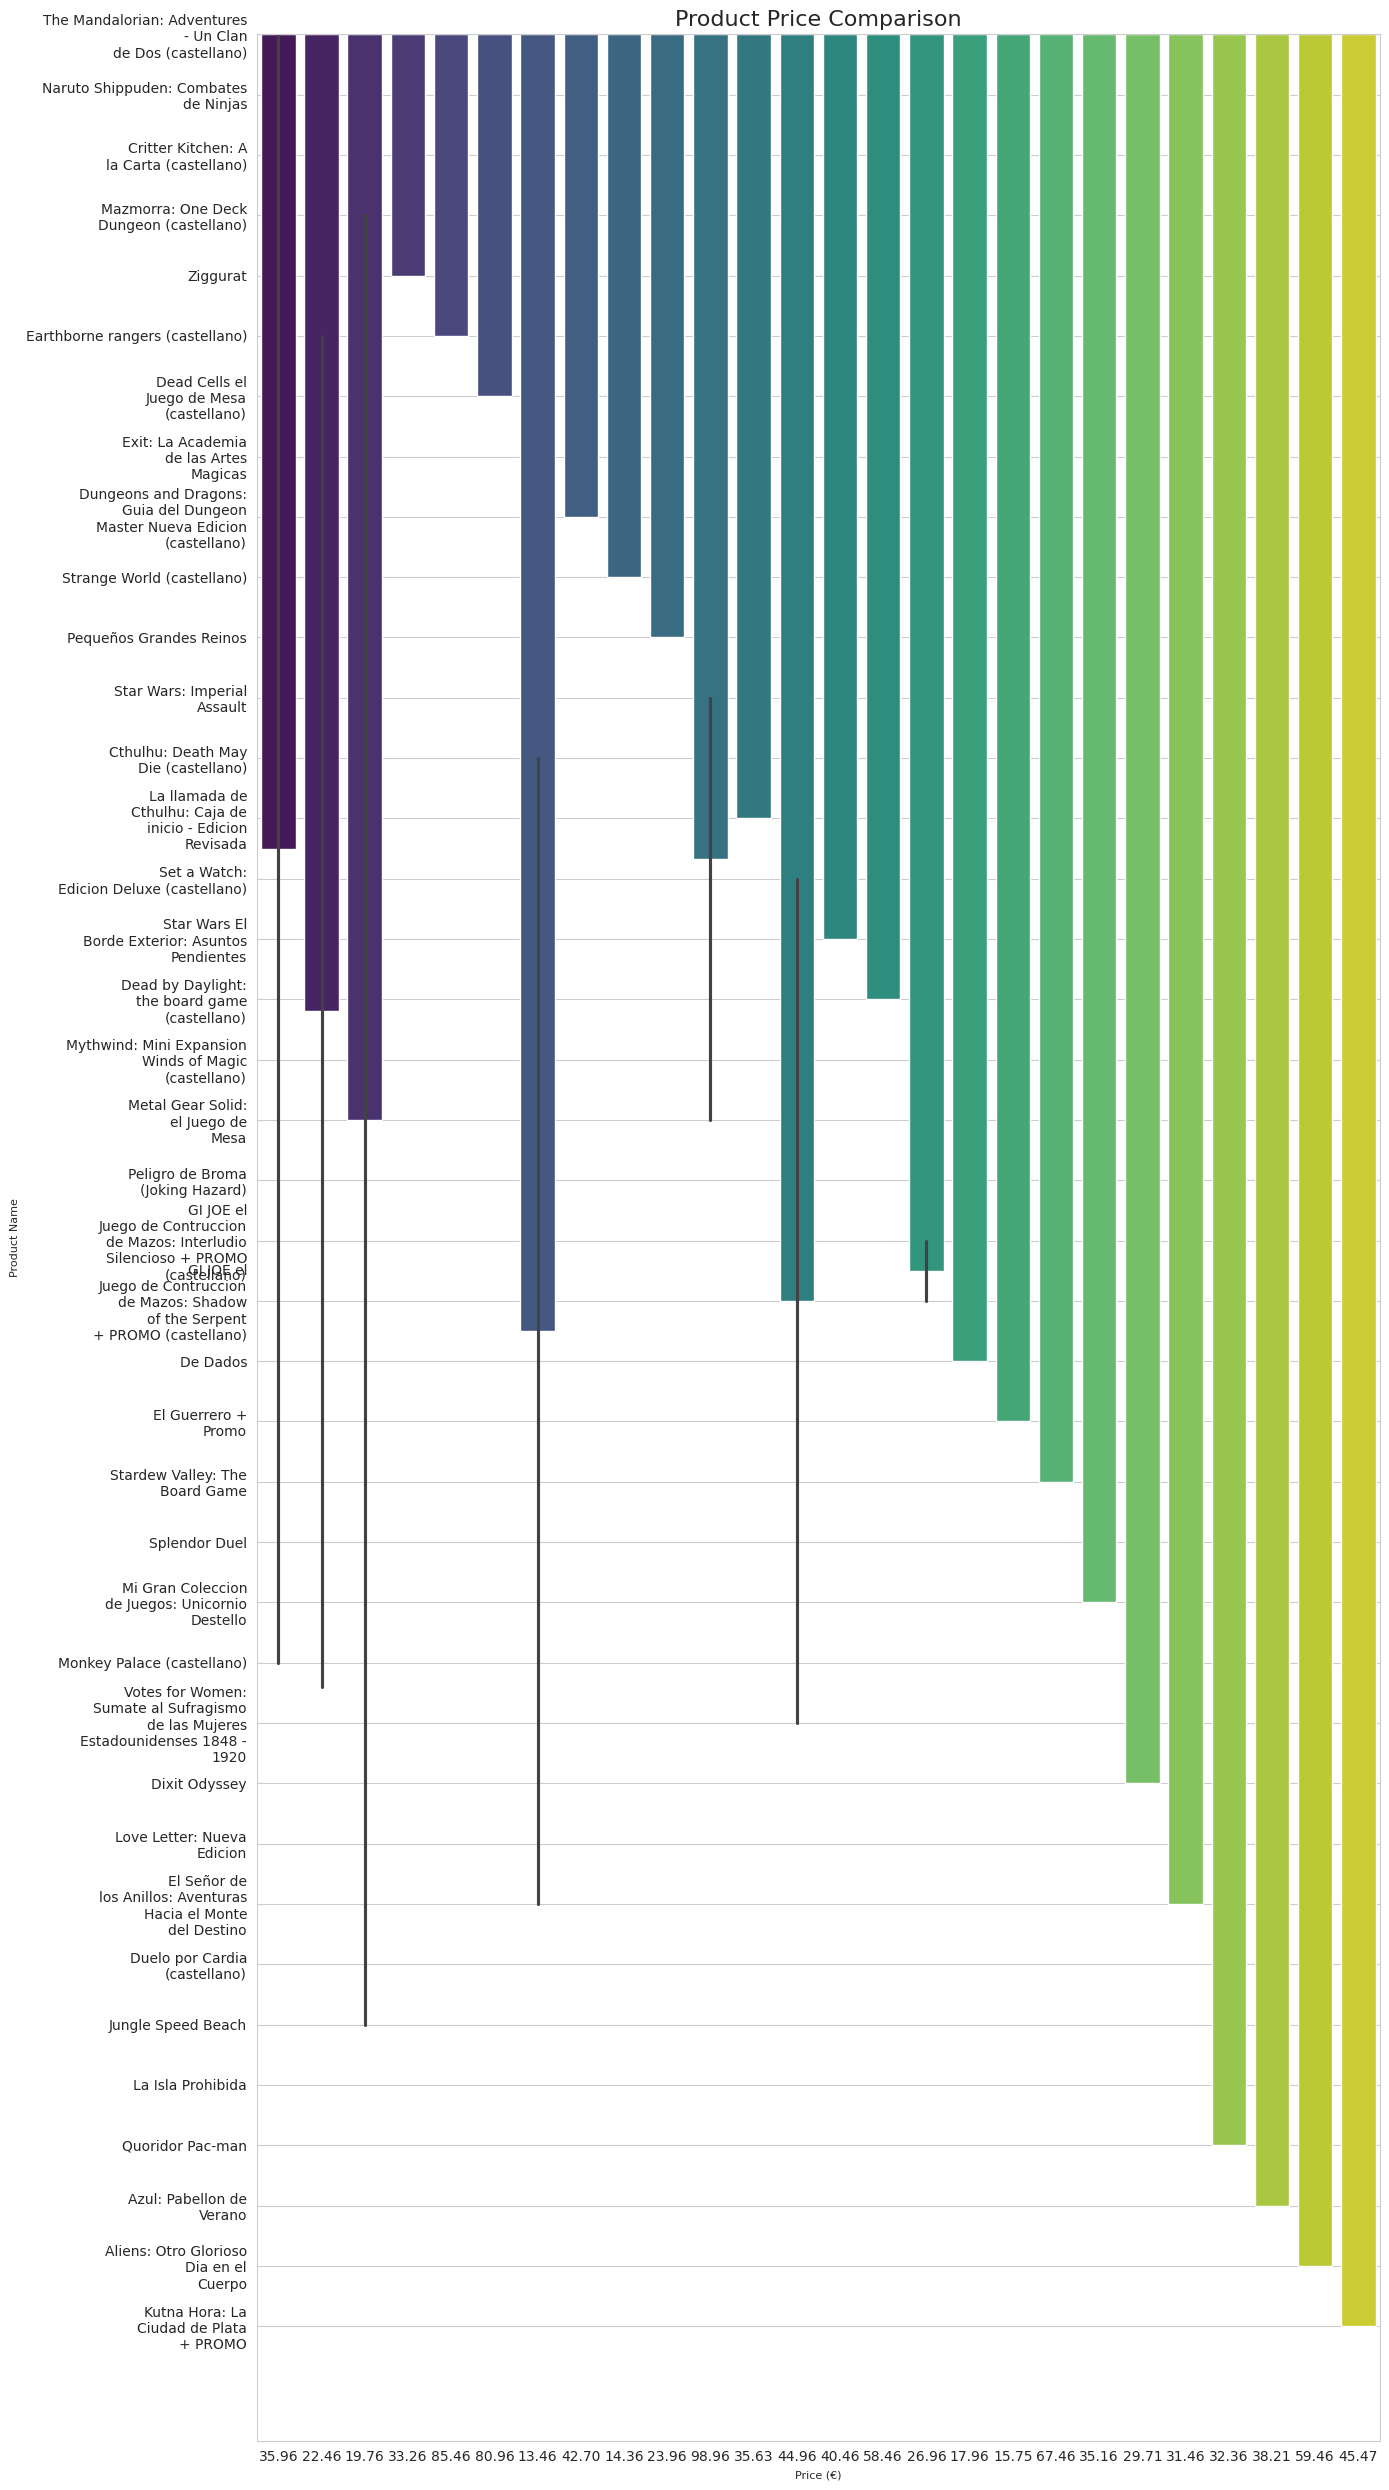

In [ ]:
def wrap_labels(text, width=3):
    words = text.split(' ')
    wrapped_lines = []
    for i in range(0, len(words), width):
        wrapped_lines.append(' '.join(words[i:i+width]))
    return '\n'.join(wrapped_lines)


df['wrapped_name'] = df['name'].apply(lambda x: wrap_labels(x, width=3))
sns.set_style("whitegrid")
plt.figure(figsize=(14, 25))
sns.barplot(x='price_float',
            y=df['wrapped_name'],
            data=df.sort_values(by='price_float'),
            palette="viridis")


plt.title('Product Price Comparison', fontsize=16)
plt.xlabel('Price (€)', fontsize=8)
plt.ylabel('Product Name', fontsize=8)
plt.tight_layout() 
plt.show()